[IPython Notebook](hierarchicial_triple.ipynb) |  [Python Script](hierarchical_triple.py)

Minimal Hierarchical Triple
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger(clevel='INFO')

b = phoebe.Bundle.default_triple()

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


Adding Datasets
----------------------

In [3]:
b.add_dataset('LC', time=np.linspace(0,10,201), dataset='lc01')

<ParameterSet: 22 parameters | methods: LC, LC_dep>

In [4]:
b.add_dataset('RV', time=np.linspace(0,10,201), dataset='rv01')

<ParameterSet: 31 parameters | methods: RV, RV_dep>

In [5]:
b.add_dataset('ORB', time=np.linspace(0,10,201), dataset='orb01')

<ParameterSet: 4 parameters | components: _default, starA, starC, starB>

In [6]:
b.add_dataset('ETV', N=np.linspace(0,20,21), dataset='etv01')

<ParameterSet: 25 parameters | sections: dataset, constraint>

Let's look at this hierarchy of the system.  Here we can see that starA and starB are in the inner-orbit and starC is the "companion"

In [7]:
print b.hierarchy


    orbit:outer 
    
        orbit:inner 
        
            star:starA 
            star:starB
         
        star:starC
    



By default, adding an RV dataset adds entries for all three stars.  If we wanted only the inner-binary, for example, we would have provided component=['starA', 'starB'] when calling add_dataset.

In [11]:
print b['time@rv01']

time@_default@rv01@dataset: [  0.     0.05   0.1    0.15   0.2    0.25   0.3    0.35   0.4    0.45
   0.5    0.55   0.6    0.65   0.7    0.75   0.8    0.85   0.9    0.95   1.
   1.05   1.1    1.15   1.2    1.25   1.3    1.35   1.4    1.45   1.5
   1.55   1.6    1.65   1.7    1.75   1.8    1.85   1.9    1.95   2.     2.05
   2.1    2.15   2.2    2.25   2.3    2.35   2.4    2.45   2.5    2.55
   2.6    2.65   2.7    2.75   2.8    2.85   2.9    2.95   3.     3.05
   3.1    3.15   3.2    3.25   3.3    3.35   3.4    3.45   3.5    3.55
   3.6    3.65   3.7    3.75   3.8    3.85   3.9    3.95   4.     4.05
   4.1    4.15   4.2    4.25   4.3    4.35   4.4    4.45   4.5    4.55
   4.6    4.65   4.7    4.75   4.8    4.85   4.9    4.95   5.     5.05
   5.1    5.15   5.2    5.25   5.3    5.35   5.4    5.45   5.5    5.55
   5.6    5.65   5.7    5.75   5.8    5.85   5.9    5.95   6.     6.05
   6.1    6.15   6.2    6.25   6.3    6.35   6.4    6.45   6.5    6.55
   6.6    6.65   6.7    6.75   6.8    

Similarly, the ETV dataset will add entries for all stars in which the other component in the same orbit is also a star.  The corresponding ETVs are then the timings of the eclipse in which that component is eclipsed by the other star in its orbit.

Since starC does not have a star in its orbit (the other component is a nested binary), it cannot have timings computed.

In [15]:
print b['time_ephem@etv01@dataset']

*time_ephem@_default@etv01@dataset: [   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.  110.
  120.  130.  140.  150.  160.  170.  180.  190.  200.] d
*time_ephem@starA@etv01@dataset: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.] d
*time_ephem@starC@etv01@dataset: [] d
*time_ephem@starB@etv01@dataset: [  0.5   1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5  10.5  11.5
  12.5  13.5  14.5  15.5  16.5  17.5  18.5  19.5  20.5] d


Running Compute
-----------------------

Since this is a triple system and we know that the barycenter of the inner-binary is moving, let's enable light-time effects (ltte).  Let's also do dynamical RVs (they're faster and we aren't really worrying about Rossiter-McLaughlin effects for this case).

In [16]:
b.add_compute(compute='phoebe', ltte=True, rv_method='dynamical', etv_tol=1*u.s)

<ParameterSet: 25 parameters | qualifiers: store_mesh, lc_method, refl, mesh_method, dynamics_method, gridsize, rv_method, irradiation_alg, subdiv_num, distortion_method, eclipse_alg, refl_num, etv_method, ltte, rv_grav, orbiterror, stepsize, delta, boosting_alg, atm, enabled, heating, subdiv_alg, etv_tol, maxpoints>

In [17]:
b.run_compute(compute='phoebe')

/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1863: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1863: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1863: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1863: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1863: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  the_gr

<ParameterSet: 41 parameters | methods: ETV, RV, ORB, LC>

Plotting
-------------------------

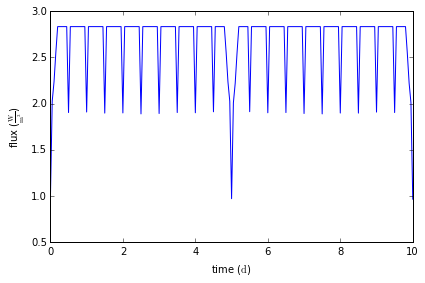

In [18]:
axs, artists = b['lc01@model'].plot()

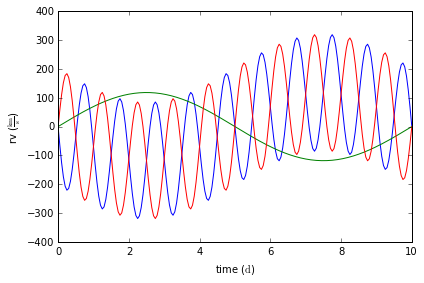

In [19]:
axs, artists = b['rv01@model'].plot()

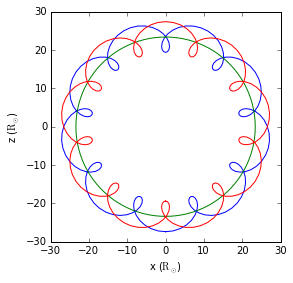

In [20]:
axs, artists = b['orb01@model'].plot(y='z')

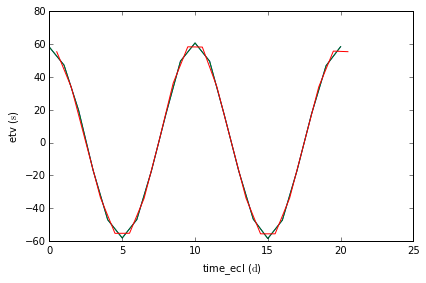

In [21]:
axs, artists = b['etv01@model'].plot(yunit=u.s)

As a quick sanity check, since most of the ETVs should be caused by light-time effects, let's compute the light-time delay for this orbit.  From the RV plot it looks like the orbit swings in z by a little over 20 solar radii.  Dividing that by the speed of light should then give the approximate amplitude of the "observed" ETVs.  The period of the ETV signal should be that of the outer-orbit.

In [22]:
import astropy.constants as c
((20*u.solRad).to(u.m)/c.c).to(u.s)

<Quantity 46.399299344615265 s>

In [23]:
print b.get_quantity('period@outer@component')

10.0 d
